# Name:Priya Kumari

#####  Dataset: The Alphabet  dataset used below consists of images of alphabets represented by a total of 785 columns, where the first column represents the alphabet numbering from 0-25 as A-Z. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
import warnings
warnings.filterwarnings("ignore")

### Download and load the dataset. Split into train and test sets. Create a validation set . Display a few images.

In [2]:
#load the dataset
data=pd.read_csv("Alphabet_Data.csv")
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The first column in the dataset, represented as '0', corresponds to the alphabetical characters from A-Z and is numbered from 0-25

In [3]:
data.shape

(93121, 785)

There are  93121  rows and 785 columns

In [4]:
#splitting data into training and testing sets.
#The stratify parameter ensures that the label distribution is maintained between the training and testing set
train,test = train_test_split(data, test_size=0.20, stratify=data['0'])
train.shape,test.shape

((74496, 785), (18625, 785))

In [5]:
#count the number of occurrences of each label in the train DataFrame
label_counts = train['0'].value_counts()
label_counts

14    11565
18     9684
20     5802
2      4682
19     4499
15     3869
13     3802
0      2774
12     2467
11     2318
17     2314
4      2288
24     2172
22     2157
3      2027
1      1734
9      1699
7      1444
23     1254
25     1215
16     1162
6      1153
10     1121
21      837
5       233
8       224
Name: 0, dtype: int64

In [6]:
#dropping the first column ('0') from the train 
x = train.drop('0', axis=1)
#extracting the label data from the train
y = train['0']

#splitting the training data into a new training set and a validation set.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.16666, random_state=42)

x_test = test.drop('0', axis=1)
y_test = test['0']


In [7]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((62080, 784), (12416, 784), (62080,), (12416,))

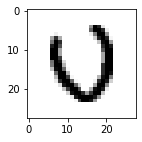

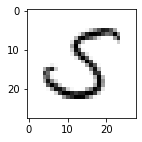

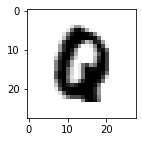

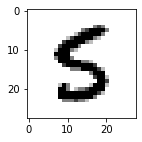

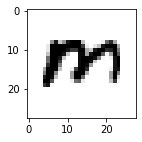

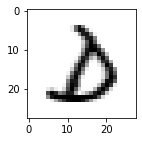

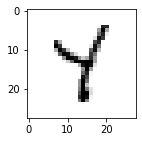

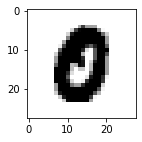

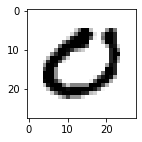

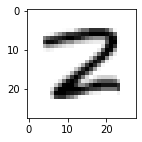

In [33]:
'''
Displaying a few more images. We are padding the pixel data into a 28x28 array and then using imshow() function from matplotlib to
plot the image. We are displaying 10 random images from the train dataset.
'''

disp_index = [1,141,100,811,512,3003,1111,807,3166,2294]

for m in disp_index:
    img_data = []
    k = []
    cnt = 1
    for z in x_train.loc[m]:
        if(int(cnt)%28 == 0):
            k.append(z)
            img_data.append(k)
            cnt+=1
            k=[]
        else:
            k.append(z)
            cnt+=1
    plt.figure(figsize=(2, 2))
    plt.imshow(img_data, cmap=plt.cm.binary)
    plt.show()


##  Multinomial Logistic Regression (softmax regression)

In [122]:
'''
We will be changing the values of 3 hyper-parameters:- penalty, max_iter and C, to see the impact of the hyperparameters.
The solver parameter specifies the algorithm to use in the optimization problem.
The penalty parameter specifies the type of regularization to be used.
The max_iter parameter specifies the maximum number of iterations for the solver to converge
The C parameter specifies the inverse of the regularization strength.
'''

penalty = ['none', 'l2']
max_iter = [100, 500, 1000]
C = [0.001, 1.0, 100.0]

for a in penalty:
    for b in max_iter:
        for c in C:
            model_1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty=a, max_iter=b, C=c)
            model_1.fit(x_train, y_train)
            y_pred_train = model_1.predict(x_train)
            accuracy_train = accuracy_score(y_train, y_pred_train)
            f1_train=f1_score(y_train, y_pred_train, average='weighted')
            y_pred_val = model_1.predict(x_val)
            accuracy_val = accuracy_score(y_val, y_pred_val)
            f1_val = f1_score(y_val, y_pred_val, average='weighted')
            y_pred_test = model_1.predict(x_test)
            accuracy_test = accuracy_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test, average='weighted')
            print("Model with penalty =",a,"max_iter =",b,"C =",c)
            print("Train Accuracy:", accuracy_train, "Validation Accuracy:", accuracy_val, "Test Accuracy:", accuracy_test)
            print("Train F1 score:", f1_train, "Validation F1 score:", f1_val, "Test f1 score:", f1_test)
            print("\n")

Model with penalty = none max_iter = 100 C = 0.001
Train Accuracy: 0.892284149484536 Validation Accuracy: 0.8663820876288659 Test Accuracy: 0.8686174496644296
Train F1 score: 0.891647500222681 Validation F1 score: 0.8651989850299983 Test f1 score: 0.8677401775515268


Model with penalty = none max_iter = 100 C = 1.0
Train Accuracy: 0.892284149484536 Validation Accuracy: 0.8663820876288659 Test Accuracy: 0.8686174496644296
Train F1 score: 0.891647500222681 Validation F1 score: 0.8651989850299983 Test f1 score: 0.8677401775515268


Model with penalty = none max_iter = 100 C = 100.0
Train Accuracy: 0.892284149484536 Validation Accuracy: 0.8663820876288659 Test Accuracy: 0.8686174496644296
Train F1 score: 0.891647500222681 Validation F1 score: 0.8651989850299983 Test f1 score: 0.8677401775515268


Model with penalty = none max_iter = 500 C = 0.001
Train Accuracy: 0.9029961340206185 Validation Accuracy: 0.8563949742268041 Test Accuracy: 0.8589530201342281
Train F1 score: 0.9025757203615234 

The logistic regression model with penalty=l2, max_iter=100, and C=0.001 was found to be the best-performing model based on the results obtained. It achieved higher test accuracy (0.869) and test F1 score (0.8686) than all other models. The use of regularization through penalty=l2 generally led to better performance across the models. Although logistic regression achieved an accuracy of about 85-86% on the test set, there may be other models that could potentially outperform it and produce better results.

# Support Vector Machines

### SGD as LinearSVC

In [11]:

C = [0.001, 1.0, 100.0]
for c in C:
    sgd = SGDClassifier(loss='hinge', alpha=1/(len(x_train)*c), fit_intercept=True, max_iter=1000)
    sgd.fit(x_train, y_train)
    y_pred_train = sgd.predict(x_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    f1_train=f1_score(y_train, y_pred_train, average='weighted')
    y_pred_val = sgd.predict(x_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    f1_val = f1_score(y_val, y_pred_val, average='weighted')
    y_pred_test = sgd.predict(x_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    print("Model with C =",c)
    print("Train Accuracy:", accuracy_train, "Validation Accuracy:", accuracy_val, "Test Accuracy:", accuracy_test)
    print("Train F1 score:", f1_train, "Validation F1 score:", f1_val, "Test f1 score:", f1_test)
    print("\n")

Model with C = 0.001
Train Accuracy: 0.7882087628865979 Validation Accuracy: 0.7629671391752577 Test Accuracy: 0.7706308724832215
Train F1 score: 0.7892802458571851 Validation F1 score: 0.7616655877082997 Test f1 score: 0.7711497492937867


Model with C = 1.0
Train Accuracy: 0.7020779639175257 Validation Accuracy: 0.6805734536082474 Test Accuracy: 0.6904161073825503
Train F1 score: 0.6966198646842083 Validation F1 score: 0.6721897550830878 Test f1 score: 0.6833812781515608


Model with C = 100.0
Train Accuracy: 0.7655605670103093 Validation Accuracy: 0.7417042525773195 Test Accuracy: 0.7481342281879194
Train F1 score: 0.7668890017104963 Validation F1 score: 0.7420549745762961 Test f1 score: 0.7485420978720004




The value of the regularization parameter C determines the trade-off between the model's ability to fit the training data closely and its ability to generalize well to new  data. When C is set to a very small value like 0.001, the model is highly regularized and may not fit the training data well, but it may generalize better to new data. However, if C is set too high, the model may overfit to the training data and not generalize well. Therefore, finding the optimal value of C requires careful experimentation and evaluation on multiple datasets.In the above scenario, model with c=0.001 performs better with test accuracy as 0.77

### Using different Kernels

In [13]:

kernel = ['linear','rbf','poly']
C = [0.001, 1.0, 100.0]
gamma = ['scale','auto']

batch_size = 10000
num_batches = int(x_train.shape[0] / batch_size)

for a in kernel:
    for b in C:
        for c in gamma:
            model_2 = SVC(kernel=a,gamma=c,C=b)
            for i in range(num_batches):
                batch_x = x_train[i*batch_size:(i+1)*batch_size]
                batch_y = y_train[i*batch_size:(i+1)*batch_size]
                model_2.fit(batch_x, batch_y)
            y_pred_train = model_2.predict(x_train)
            accuracy_train = accuracy_score(y_train, y_pred_train)
            f1_train = f1_score(y_train, y_pred_train,average='weighted')
            y_pred_val = model_2.predict(x_val)
            accuracy_val = accuracy_score(y_val, y_pred_val)
            f1_val = f1_score(y_val, y_pred_val,average='weighted')
            y_pred_test = model_2.predict(x_test)
            accuracy_test = accuracy_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test,average='weighted')
            print("Model with kernel =",a," C=",b," gamma=",c)
            print("Train Accuracy:", accuracy_train, "Validation Accuracy:", accuracy_val, "Test Accuracy:", accuracy_test)
            print("Train f1 score:", f1_train, "Validation f1 score:", f1_val, "Test f1 score:", f1_test)
            print("\n")

Model with kernel = linear  C= 0.001  gamma= scale
Train Accuracy: 0.8890302835051547 Validation Accuracy: 0.8658182989690721 Test Accuracy: 0.8653959731543625
Train f1 score: 0.889267013426636 Validation f1 score: 0.865771021155259 Test f1 score: 0.8655351371142919


Model with kernel = linear  C= 0.001  gamma= auto
Train Accuracy: 0.8890302835051547 Validation Accuracy: 0.8658182989690721 Test Accuracy: 0.8653959731543625
Train f1 score: 0.889267013426636 Validation f1 score: 0.865771021155259 Test f1 score: 0.8655351371142919


Model with kernel = linear  C= 1.0  gamma= scale
Train Accuracy: 0.8890302835051547 Validation Accuracy: 0.8658182989690721 Test Accuracy: 0.8653959731543625
Train f1 score: 0.889267013426636 Validation f1 score: 0.865771021155259 Test f1 score: 0.8655351371142919


Model with kernel = linear  C= 1.0  gamma= auto
Train Accuracy: 0.8890302835051547 Validation Accuracy: 0.8658182989690721 Test Accuracy: 0.8653959731543625
Train f1 score: 0.889267013426636 Valid

From the results above, it appears that the linear kernel with different combinations of C and gamma values produce similar accuracy and f1 score results for all three datasets, whereas the rbf kernel yielded better results, particularly with higher C values. The most optimal model was identified as the rbf kernel with C=100 and gamma=scale. It is worth noting that the rbf kernel with gamma=auto performed poorly, potentially due to the default calculation of 1 / (n_features * X.var()) not being the most appropriate for this dataset. Overall, the rbf kernel with C=100 and gamma=scale emerged as the most effective model out of all the models examined with an accuracy of 0.9385.

### Polynomial Kernel

In [9]:
degrees = [1, 2, 3, 5, 7, 9]

batch_size = 10000
num_batches = int(x_train.shape[0] / batch_size)
for degree_value in degrees:
            model_2 = SVC(kernel='poly',degree=degree_value)
            for i in range(num_batches):
                batch_x = x_train[i*batch_size:(i+1)*batch_size]
                batch_y = y_train[i*batch_size:(i+1)*batch_size]
                model_2.fit(batch_x, batch_y)
            y_pred_train = model_2.predict(x_train)
            accuracy_train = accuracy_score(y_train, y_pred_train)
            f1_train = f1_score(y_train, y_pred_train,average='weighted')
            y_pred_val = model_2.predict(x_val)
            accuracy_val = accuracy_score(y_val, y_pred_val)
            f1_val = f1_score(y_val, y_pred_val,average='weighted')
            y_pred_test = model_2.predict(x_test)
            accuracy_test = accuracy_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test,average='weighted')
            print("Model with degree =",degree_value)
            print("Train Accuracy:", accuracy_train, "Validation Accuracy:", accuracy_val, "Test Accuracy:", accuracy_test)
            print("Train f1 score:", f1_train, "Validation f1 score:", f1_val, "Test f1 score:", f1_test)
            print("\n")

Model with degree = 1
Train Accuracy: 0.8852770618556701 Validation Accuracy: 0.8770135309278351 Test Accuracy: 0.88048322147651
Train f1 score: 0.8841154669943685 Validation f1 score: 0.8753495745400449 Test f1 score: 0.8789631799001123


Model with degree = 2
Train Accuracy: 0.9165431701030928 Validation Accuracy: 0.9060083762886598 Test Accuracy: 0.9111946308724832
Train f1 score: 0.9157512542693804 Validation f1 score: 0.9048787243771336 Test f1 score: 0.9102608282787787


Model with degree = 3
Train Accuracy: 0.8939432989690722 Validation Accuracy: 0.8805573453608248 Test Accuracy: 0.8838120805369127
Train f1 score: 0.8947350879540427 Validation f1 score: 0.8807599846558871 Test f1 score: 0.8845162296370496


Model with degree = 5
Train Accuracy: 0.7978898195876288 Validation Accuracy: 0.7771423969072165 Test Accuracy: 0.7822281879194631
Train f1 score: 0.8181555529923229 Validation f1 score: 0.7967383096408899 Test f1 score: 0.8017207081000921


Model with degree = 7
Train Accura

The results indicate that the polynomial model with degree=2 performs the best on both the validation and test sets, with the highest accuracy and F1 score. The models with degree=1 and 3 also perform well, but not as well as the degree=2 model. On the other hand, the models with degree=5 , 7 and 9 perform worse than the models with degree=1, 2, and 3. Therefore, it appears that a polynomial model with degree=2 is the most suitable choice for this particular classification task with an accuracy of 0.91

# Random Forest Classifier

In [12]:
'''
We will be changing the values of 3 hyper-parameters:- n_estimators, max_depth and min_samples_split, to see the impact of the hyperparameters.
'''

n_estimators = [10, 50, 100]
max_depth = [5, 10, 20]
min_samples_split = [2, 5, 10]

for a in n_estimators:
    for b in max_depth:
        for c in min_samples_split:
            model_3 = RandomForestClassifier(n_estimators=a, max_depth=b, min_samples_split=c)
            model_3.fit(x_train, y_train)
            y_pred_train = model_3.predict(x_train)
            accuracy_train = accuracy_score(y_train, y_pred_train)
            y_pred_val = model_3.predict(x_val)
            accuracy_val = accuracy_score(y_val, y_pred_val)
            y_pred_test = model_3.predict(x_test)
            accuracy_test = accuracy_score(y_test, y_pred_test)
            print("Model with n_estimators =",a,"max_depth =",b,"min_samples_split =",c)
            print("Train Accuracy:", accuracy_train, "Validation Accuracy:", accuracy_val, "Test Accuracy:", accuracy_test)
            print("\n")

Model with n_estimators = 10 max_depth = 5 min_samples_split = 2
Train Accuracy: 0.6159954896907216 Validation Accuracy: 0.6076836340206185 Test Accuracy: 0.6090738255033558


Model with n_estimators = 10 max_depth = 5 min_samples_split = 5
Train Accuracy: 0.6127094072164948 Validation Accuracy: 0.6036565721649485 Test Accuracy: 0.6092885906040268


Model with n_estimators = 10 max_depth = 5 min_samples_split = 10
Train Accuracy: 0.6142557989690721 Validation Accuracy: 0.6048646907216495 Test Accuracy: 0.6095570469798658


Model with n_estimators = 10 max_depth = 10 min_samples_split = 2
Train Accuracy: 0.8985985824742269 Validation Accuracy: 0.8599387886597938 Test Accuracy: 0.8645369127516779


Model with n_estimators = 10 max_depth = 10 min_samples_split = 5
Train Accuracy: 0.8963595360824742 Validation Accuracy: 0.8542203608247423 Test Accuracy: 0.8592751677852349


Model with n_estimators = 10 max_depth = 10 min_samples_split = 10
Train Accuracy: 0.8994523195876288 Validation Accu

Based on the above results, it was observed that the model with n_estimators = 100, max_depth = 20, and min_samples_split = 2 had the best accuracy with value of 0.944 on both the validation and test sets. While increasing the number and depth of decision trees tends to increase accuracy, excessive depth may result in overfitting. Additionally, an increase in the minimum number of samples required to split an internal node can prevent overfitting. 

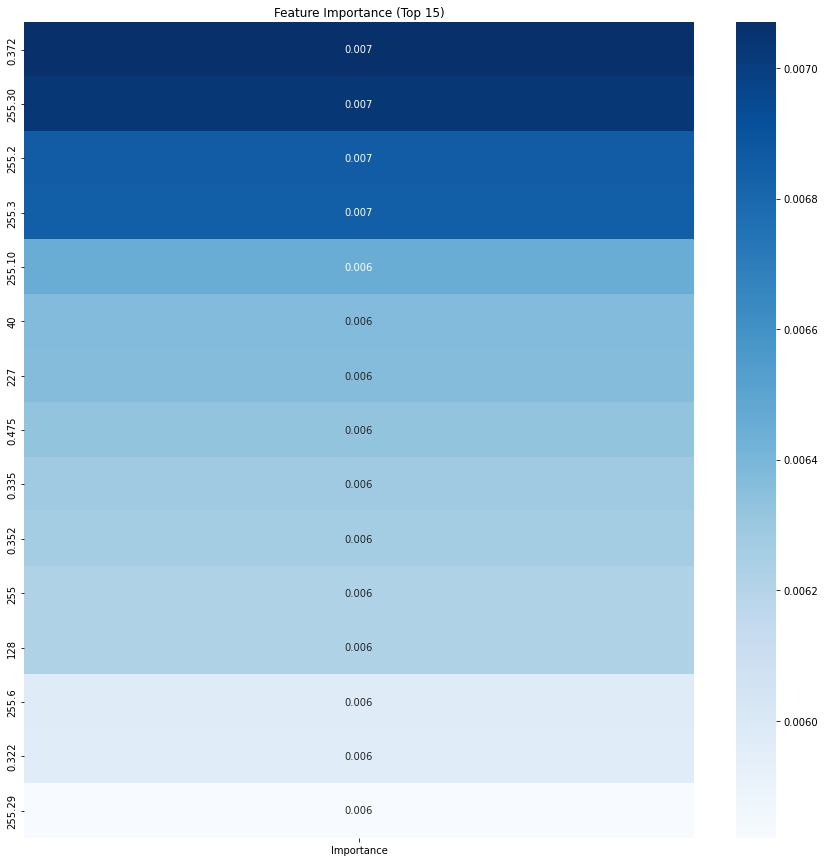

In [16]:
'''
Feature importance analysis using in-built function for random forest. From this, we can find out the features which are most
impacting and features which have the least influence on the model.
'''
import seaborn as sns
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=10)
clf_rf.fit(x_train, y_train)
feature_importance = dict(zip(x_train.columns, clf_rf.feature_importances_))
indices = np.argsort(feature_importance)[::-1]

feature_importance = dict(zip(x_train.columns, clf_rf.feature_importances_))

df_feature_importance = pd.DataFrame.from_dict(feature_importance, orient='index', columns=['Importance'])
df_feature_importance = df_feature_importance.sort_values('Importance', ascending=False)

# Selecting top 15 features
top_features = df_feature_importance[:15]


fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(top_features, cmap='Blues', annot=True, fmt='.3f', ax=ax)
plt.title('Feature Importance (Top 15)')
plt.show()

The above plot shows top 15 features which are selected based on their importance scores, and a heatmap is plotted .The heatmap exhibits the top 15 features with their respective importance scores, where a higher score implies a greater importance in predicting the target variable.The column '0.372' has the highest feature importance with a value of 0.007.

# Ensemble

In [17]:
'''
We will now create an ensemble model out of the 3 best performing models which are:
Multinomial Logistic Regression (Softmax Regression) with penalty = 'l2' | max_iter = 100 | C = 0.001
SVM with kernel as 'rbf'
Random Forest Classifier with n_estimators = 100 | max_depth = 20 | min_samples_split = 2
'''

clf_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', max_iter=100, C=0.001)
clf_svm = SVC(kernel='rbf',probability=True)
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2)

In [18]:
voting_clf = VotingClassifier(
 estimators=[('lr', clf_lr), ('svm', clf_svm), ('rf', clf_rf)],
 voting='soft')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.001,
                                                 multi_class='multinomial')),
                             ('svm', SVC(probability=True)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_split=10))],
                 voting='soft')

In [19]:
y_pred = voting_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9495838926174497


The above voting classifier  utilizes three models, namely logistic regression, support vector machine, and random forest, to combine their predictions using soft voting. In soft voting, the predicted class is selected based on the highest probability of a class across all models. TThe accuracy of the voting classifier is reported to be almost 0.95. This accuracy is better than all the individual accuracies achieved by the three models used in the ensemble, suggesting that the combination of models and the voting method helped to improve the overall accuracy of the predictions.